In [1]:
import numpy as np
from pathlib import Path
from utils import MyWarp
import my_utils as mylib

ROOT = Path("./data")
IMAGES = ROOT / "q1"

AFFINE_ANNOTATION = ROOT / "annotation" / "q1_annotation.npy"
METRIC_ANNOTATION = ROOT / "annotation" / "q2_annotation.npy"

CURRENT_IMAGE = IMAGES / "chess1.jpg"

In [2]:
data = np.load(AFFINE_ANNOTATION, allow_pickle=True)
affine_annotations = data.item()[CURRENT_IMAGE.stem]

data = np.load(METRIC_ANNOTATION, allow_pickle=True)
metric_annotations = data.item()[CURRENT_IMAGE.stem]

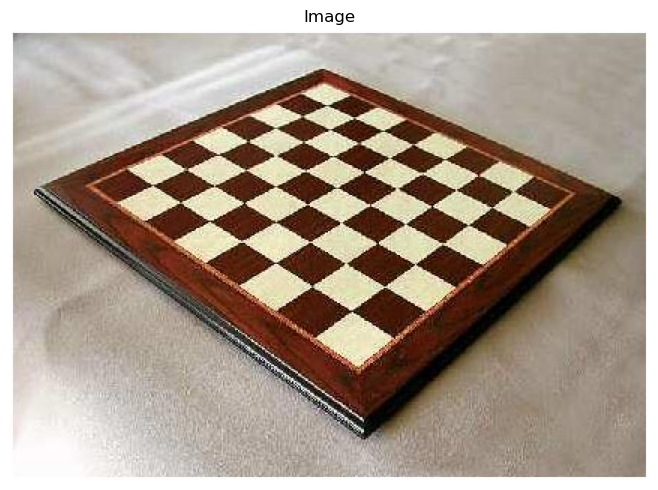

In [3]:
image = mylib.load_image(CURRENT_IMAGE)
mylib.show_images([image], ['Image'])

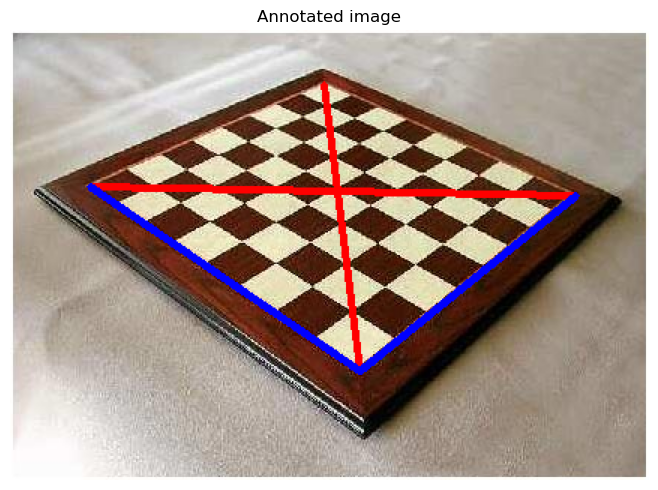

In [4]:
mylib.show_annotated_lines(image, metric_annotations)

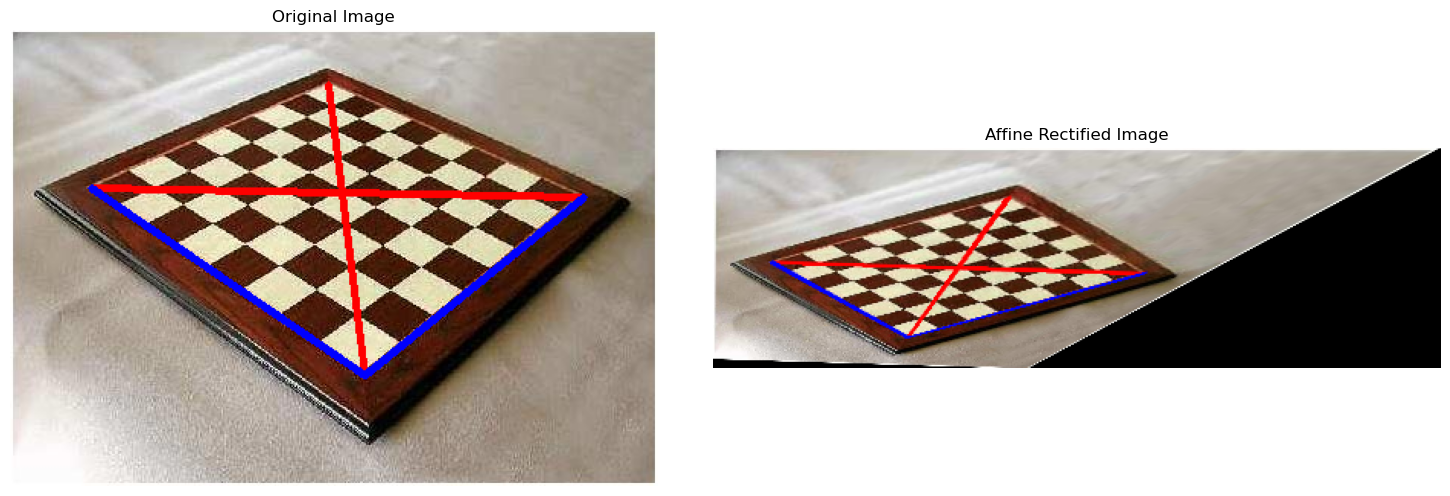

In [5]:
H_affine = mylib.get_affine_rectification_matrix(affine_annotations)
affine_rectified_image = MyWarp(image, H_affine)

mylib.show_images([image, affine_rectified_image], ['Original Image', 'Affine Rectified Image'])

In [6]:
mylib.verfiy_angles(H_affine, affine_annotations)

Pairs number 1.0:
Before: 0.9634361913316474
After: 0.9999999999999999
Pairs number 2.0:
Before: 0.9830195276215085
After: 1.0


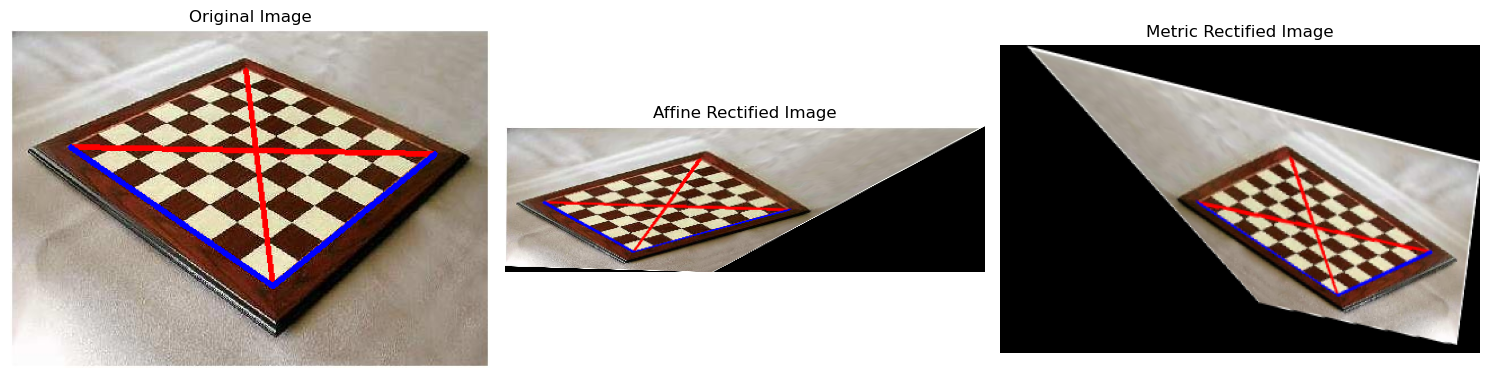

In [7]:
H_metric = mylib.get_metric_rectification_matrix(metric_annotations)
metric_rectified_image = MyWarp(affine_rectified_image, H_metric)

mylib.show_images([image, affine_rectified_image, metric_rectified_image], ['Original Image', 'Affine Rectified Image', 'Metric Rectified Image'])

In [8]:
mylib.verfiy_angles(H_metric, metric_annotations)

Pairs number 1.0:
Before: 0.14302357361564522
After: -4.3764068643810456e-17
Pairs number 2.0:
Before: -0.2850199937723189
After: -1.3937860301603517e-16
